# Redes Neurais Artificiais - Projeto Prático 2.1
## Aprendizado Supervisionado do Neurônio Perceptron



Importação das bibliotecas basicas.


In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

Calculando o identificador de exemplos

In [2]:
matriculas = [
    1815080004, # Eduardo
    2315310019, # Oziel
    2315310020 # Pedro
]
identificador = sum([matricula % 10 for matricula in matriculas]) % 4
identificador

1

### Parte 1 - Resolvendo um Problema Linearmente Separável

Lendo dados de entrada

In [3]:
dados = np.fromfile('dataAll.txt', dtype=float)
dados = dados.reshape((-1, 3)) # Ler dados de entrada em forma de matriz de 3 colunas
dados

array([[-363.7884,  244.1423,    0.    ],
       [ 328.7572, -256.7658,    1.    ],
       [-164.9827,  613.2164,    0.    ],
       ...,
       [ 872.4311,  669.1192,    1.    ],
       [ 822.6894, -702.6489,    1.    ],
       [-140.147 ,  734.0983,    0.    ]])

In [4]:
dados.shape

(1000, 3)

Gerando os pesos inciais

In [5]:
pesos = np.random.uniform(-0.5, 0.5, 2) # Gerando pesos uniformemente
pesos

array([ 0.4617474 , -0.46614798])

Executando até convergência

In [6]:
def funcao_degrau(x):
    if x < 0: return 0
    return 1
def soma(x, peso):
    resultado = 0
    for i in range(len(x)):
        resultado += x[i] * peso[i]
    return resultado

n = 0.1 # Taxa de Aprendizado
erros = 1
print("Pesos Iniciais: ",pesos)
epoca = 0
total_ajustes = 0
while(erros != 0):
    erros = 0
    for i in range(len(dados)):
        x = dados[i][0:2]
        y = dados[i][2]
        y_prev = funcao_degrau(soma(x, pesos))
        erro = y - y_prev
        erros += abs(erro)
        if erro != 0:
            pesos += n * erro * x  # atualização vetorizada
            total_ajustes += 1
    print("Época %02d: Erros: %03d Pesos:"%(epoca, erros), pesos)
    epoca += 1
print("\nTotal de Ajustes de Pesos:",total_ajustes)
print("Quantidade de Épocas até Convergência:",epoca)


Pesos Iniciais:  [ 0.4617474  -0.46614798]
Época 00: Erros: 037 Pesos: [ 286.6242374  -292.49247798]
Época 01: Erros: 027 Pesos: [ 340.0081174  -420.92578798]
Época 02: Erros: 018 Pesos: [ 417.5364074  -417.44614798]
Época 03: Erros: 000 Pesos: [ 417.5364074  -417.44614798]

Total de Ajustes de Pesos: 82
Quantidade de Épocas até Convergência: 4


Desenhando o gráfico com os pontos e reta separadora

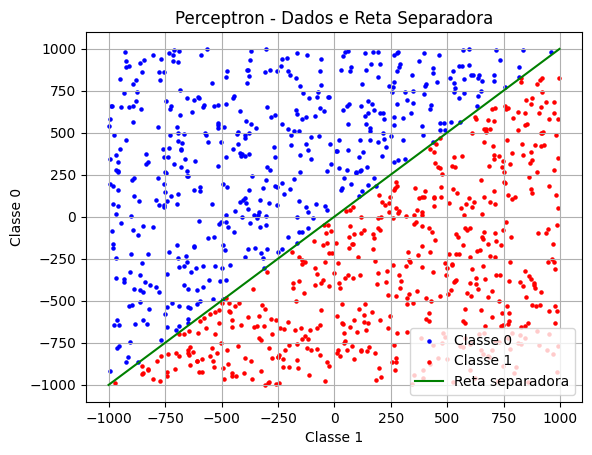

In [7]:
# Plotando os pontos no gráfico, 0 em azul e 1 em vermelho
for classe in [0, 1]:
    idx = dados[:, 2] == classe
    if classe == 0: cor, label = 'blue', 'Classe 0'
    else:           cor, label = 'red', 'Classe 1'
    plt.scatter(dados[idx, 0], dados[idx, 1], c=cor, label=label, s=5)

# Criar a reta separadora
x_vals = np.linspace(np.min(dados[:, 0])-1, np.max(dados[:, 0])+1, 200)
if pesos[1] != 0:
    y_vals = -(pesos[0] * x_vals) / pesos[1]
    plt.plot(x_vals, y_vals, 'green', label='Reta separadora')
else: # Reta é vertical
    x_vert = 0
    plt.axvline(x=x_vert, color='green', label='Reta separadora')

plt.xlabel('Classe 1')
plt.ylabel('Classe 0')
plt.title('Perceptron - Dados e Reta Separadora')
plt.legend()
plt.grid(True)
plt.show()